In [ ]:
import numpy as np
import matplotlib.pyplot as plt

from sklearn.preprocessing import  OneHotEncoder
from sklearn.compose import ColumnTransformer
import pandas as pd
import seaborn as sns
import catboost

Загрузим дата сет

In [86]:
file_dir = './dataset/'
train_dit_name = 'train.csv'
test_dit_name = 'test.csv'

In [87]:
train_set = pd.read_csv(file_dir+train_dit_name)
train_set.T

,0,1,2,3,4,5,6,7,8,9,...,1450,1451,1452,1453,1454,1455,1456,1457,1458,1459
Id,1,2,3,4,5,6,7,8,9,10,...,1451,1452,1453,1454,1455,1456,1457,1458,1459,1460
MSSubClass,60,20,60,70,60,50,20,60,50,190,...,90,20,180,20,20,60,20,70,20,20
MSZoning,RL,RL,RL,RL,RL,RL,RL,RL,RM,RL,...,RL,RL,RM,RL,FV,RL,RL,RL,RL,RL
LotFrontage,65.0,80.0,68.0,60.0,84.0,85.0,75.0,NaN,51.0,50.0,...,60.0,78.0,35.0,90.0,62.0,62.0,85.0,66.0,68.0,75.0
LotArea,8450,9600,11250,9550,14260,14115,10084,10382,6120,7420,...,9000,9262,3675,17217,7500,7917,13175,9042,9717,9937
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
MoSold,2,5,9,2,12,10,8,11,4,1,...,9,5,5,7,10,8,2,5,4,6
YrSold,2008,2007,2008,2006,2008,2009,2007,2009,2008,2008,...,2009,2009,2006,2006,2009,2007,2010,2010,2010,2008
SaleType,WD,WD,WD,WD,WD,WD,WD,WD,WD,WD,...,WD,New,WD,WD,WD,WD,WD,WD,WD,WD
SaleCondition,Normal,Normal,Normal,Abnorml,Normal,Normal,Normal,Normal,Abnorml,Normal,...,Normal,Partial,Normal,Abnorml,Normal,Normal,Normal,Normal,Normal,Normal


In [97]:
train_set.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

Расчитаем кореляцию и перобразуем дата сет

In [98]:
train_set.describe().T


,count,mean,std,min,25%,50%,75%,max
Id,1460.0,730.500000,421.610009,1.0,365.75,730.5,1095.25,1460.0
MSSubClass,1460.0,56.897260,42.300571,20.0,20.00,50.0,70.00,190.0
LotFrontage,1201.0,70.049958,24.284752,21.0,59.00,69.0,80.00,313.0
LotArea,1460.0,10516.828082,9981.264932,1300.0,7553.50,9478.5,11601.50,215245.0
OverallQual,1460.0,6.099315,1.382997,1.0,5.00,6.0,7.00,10.0
OverallCond,1460.0,5.575342,1.112799,1.0,5.00,5.0,6.00,9.0
YearBuilt,1460.0,1971.267808,30.202904,1872.0,1954.00,1973.0,2000.00,2010.0
YearRemodAdd,1460.0,1984.865753,20.645407,1950.0,1967.00,1994.0,2004.00,2010.0
MasVnrArea,1452.0,103.685262,181.066207,0.0,0.00,0.0,166.00,1600.0
BsmtFinSF1,1460.0,443.639726,456.098091,0.0,0.00,383.5,712.25,5644.0


In [ ]:


def process_dataframe(df):
    # Разделяем столбцы на числовые и категориальные
    numeric_cols = df.select_dtypes(include=['int64', 'float64']).columns.tolist()
    categorical_cols = df.select_dtypes(include=['object', 'category', 'string']).columns.tolist()

    # Создаем трансформер
    transformer = ColumnTransformer(
        [
            ('num', 'passthrough', numeric_cols),
            ('cat', OneHotEncoder(sparse_output=False, handle_unknown='ignore'), categorical_cols)
        ],
        remainder='drop'  # Игнорируем другие типы данных
    )

    # Применяем преобразования
    transformed_data = transformer.fit_transform(df)

    # Получаем имена новых столбцов
    new_columns = []
    for name, trans, cols in transformer.transformers_:
        if name == 'num':
            new_columns += cols.tolist()
        elif name == 'cat':
            encoder = trans.named_steps['cat'] if isinstance(trans, Pipeline) else trans
            new_columns += encoder.get_feature_names_out(cols).tolist()

    # Создаем новый DataFrame
    processed_df = pd.DataFrame(transformed_data, columns=new_columns, index=df.index)
    
    return processed_df

In [ ]:
def get_numers(data, sale = True):
    int_colmuns = []
    int_colmuns.extend(list(data.dtypes[data.dtypes == np.int64].index))
    int_colmuns.extend(list(data.dtypes[data.dtypes == np.float64].index))
    int_colmuns.remove('Id')
    if sale:
        int_colmuns.remove('SalePrice')
        int_colmuns.append('SalePrice')
    return pd.DataFrame(data, columns=int_colmuns)

In [45]:
train_dataset = get_numers(train_set)
train_dataset.T

,0,1,2,3,4,5,6,7,8,9,...,1450,1451,1452,1453,1454,1455,1456,1457,1458,1459
MSSubClass,60.0,20.0,60.0,70.0,60.0,50.0,20.0,60.0,50.0,190.0,...,90.0,20.0,180.0,20.0,20.0,60.0,20.0,70.0,20.0,20.0
LotArea,8450.0,9600.0,11250.0,9550.0,14260.0,14115.0,10084.0,10382.0,6120.0,7420.0,...,9000.0,9262.0,3675.0,17217.0,7500.0,7917.0,13175.0,9042.0,9717.0,9937.0
OverallQual,7.0,6.0,7.0,7.0,8.0,5.0,8.0,7.0,7.0,5.0,...,5.0,8.0,5.0,5.0,7.0,6.0,6.0,7.0,5.0,5.0
OverallCond,5.0,8.0,5.0,5.0,5.0,5.0,5.0,6.0,5.0,6.0,...,5.0,5.0,5.0,5.0,5.0,5.0,6.0,9.0,6.0,6.0
YearBuilt,2003.0,1976.0,2001.0,1915.0,2000.0,1993.0,2004.0,1973.0,1931.0,1939.0,...,1974.0,2008.0,2005.0,2006.0,2004.0,1999.0,1978.0,1941.0,1950.0,1965.0
YearRemodAdd,2003.0,1976.0,2002.0,1970.0,2000.0,1995.0,2005.0,1973.0,1950.0,1950.0,...,1974.0,2009.0,2005.0,2006.0,2005.0,2000.0,1988.0,2006.0,1996.0,1965.0
BsmtFinSF1,706.0,978.0,486.0,216.0,655.0,732.0,1369.0,859.0,0.0,851.0,...,0.0,0.0,547.0,0.0,410.0,0.0,790.0,275.0,49.0,830.0
BsmtFinSF2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,32.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,163.0,0.0,1029.0,290.0
BsmtUnfSF,150.0,284.0,434.0,540.0,490.0,64.0,317.0,216.0,952.0,140.0,...,896.0,1573.0,0.0,1140.0,811.0,953.0,589.0,877.0,0.0,136.0
TotalBsmtSF,856.0,1262.0,920.0,756.0,1145.0,796.0,1686.0,1107.0,952.0,991.0,...,896.0,1573.0,547.0,1140.0,1221.0,953.0,1542.0,1152.0,1078.0,1256.0


нормализуем данные:

<Axes: >

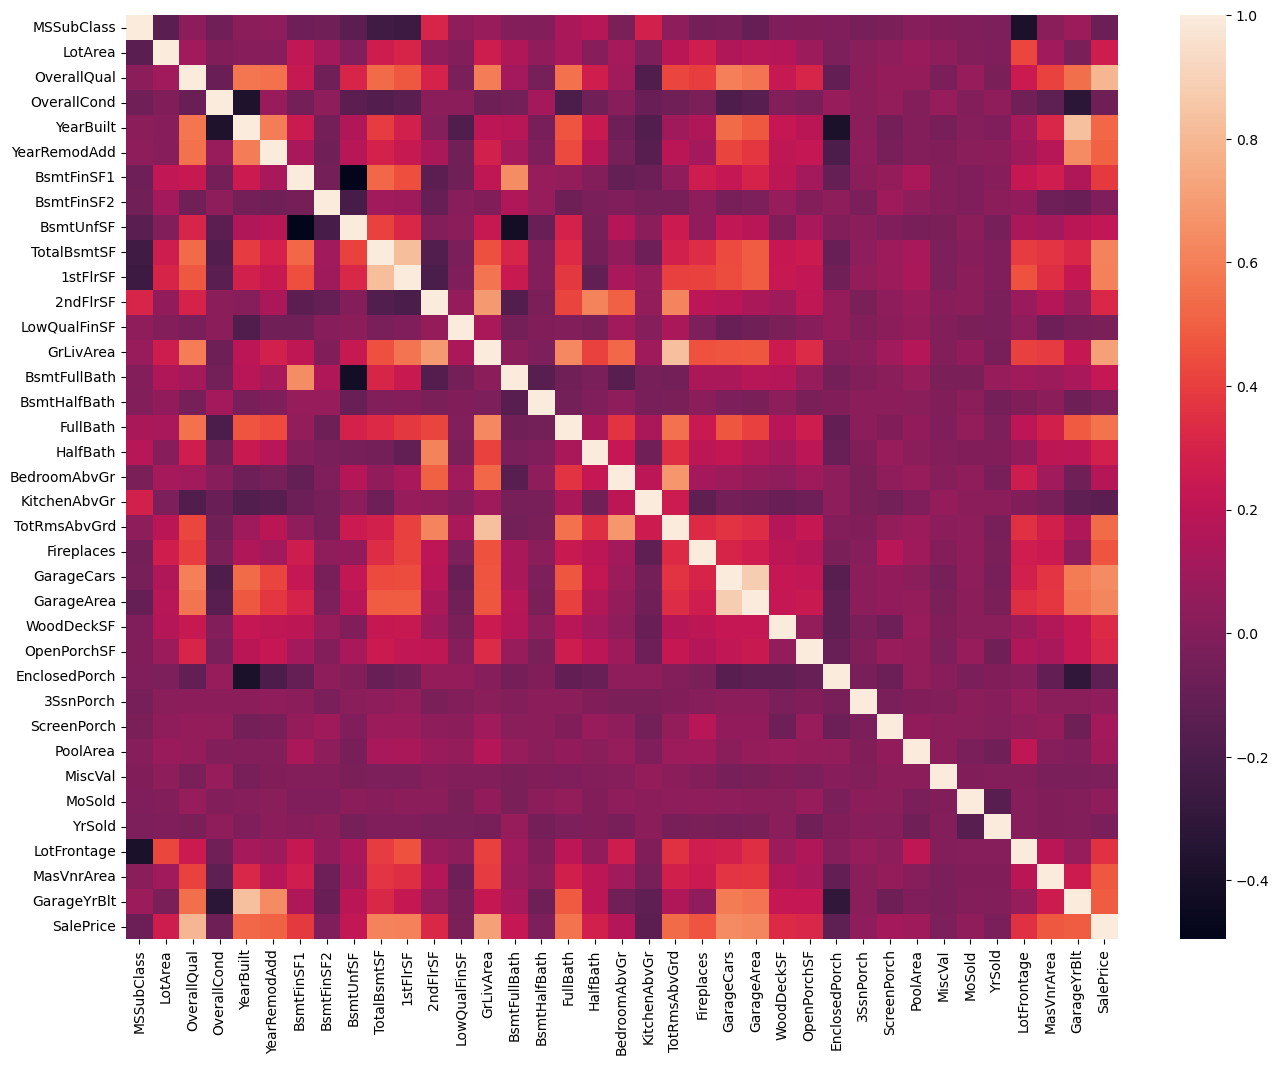

In [ ]:
cor  = train_dataset.corr()

fig, ax = plt.subplots(figsize=(16,12)) 
sns.heatmap(cor, ax=ax)

Hапишем dataset

In [58]:
np_dataset = train_dataset.to_numpy()

data_train = np_dataset[:, :-1]
lable_train = np_dataset[:, -1]

Модель

In [72]:
model = catboost.CatBoostRegressor(
    iterations=3000,
    learning_rate=1e-2,
    loss_function='RMSE',
    task_type="GPU",
    devices='0'
)

model

In [73]:
model.fit(data_train, lable_train)

0:	learn: 78844.2061354	total: 15.8ms	remaining: 47.3s
1:	learn: 78291.1957823	total: 28.3ms	remaining: 42.5s
2:	learn: 77730.3476875	total: 41ms	remaining: 41s
3:	learn: 77174.9023012	total: 55.6ms	remaining: 41.6s
4:	learn: 76623.4914859	total: 79.3ms	remaining: 47.5s
5:	learn: 76078.7046811	total: 93.8ms	remaining: 46.8s
6:	learn: 75576.8858239	total: 110ms	remaining: 47s
7:	learn: 75045.6239643	total: 123ms	remaining: 45.9s
8:	learn: 74567.7811120	total: 138ms	remaining: 45.8s
9:	learn: 74081.5801672	total: 151ms	remaining: 45.1s
10:	learn: 73591.9280100	total: 163ms	remaining: 44.3s
11:	learn: 73115.4216726	total: 177ms	remaining: 44s
12:	learn: 72612.6163097	total: 189ms	remaining: 43.4s
13:	learn: 72120.0538414	total: 202ms	remaining: 43s
14:	learn: 71617.6837536	total: 215ms	remaining: 42.9s
15:	learn: 71149.9790725	total: 230ms	remaining: 42.9s
16:	learn: 70663.4046547	total: 247ms	remaining: 43.4s
17:	learn: 70190.5463002	total: 262ms	remaining: 43.4s
18:	learn: 69726.3322350

Skore

In [74]:
model.score(data_train, lable_train)

0.9508298048585961

Predickt

In [75]:
test_data = pd.read_csv(file_dir+test_dit_name)
test_dataset = get_numers(test_data, False)

data_test = test_dataset.to_numpy()

In [76]:
out = model.predict(data_test)

In [77]:
pd.DataFrame({
    'Id':range(1461+0, 1461+len(data_test)),
    'SalePrice':out
}).to_csv('sample_submission.csv', index=False)